
DBSCAN Algorithm from Scratch in Python:
https://scrunts23.medium.com/dbscan-algorithm-from-scratch-in-python-475b82e0571c


DBSCAN Clustering Algorithm Implementation from scratch | Python:
https://becominghuman.ai/dbscan-clustering-algorithm-implementation-from-scratch-python-9950af5eed97

In [228]:
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.decomposition import PCA

In [229]:
# Step 1: Load iris dataset
iris = fetch_ucirepo(id=53)  # ID 53 adalah Iris
X = iris.data.features.values[:, :2]

In [230]:
# Step 2: Define Euclidean distance
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

In [231]:
# Step 3: Cari tetangga dalam radius eps
def region_query(X, point_idx, eps):
    neighbors = []
    for i in range(len(X)):
        if euclidean(X[point_idx], X[i]) < eps:
            neighbors.append(i)
    return neighbors

In [232]:
# Step 4: Ekspansi cluster dari core point
def expand_cluster(X, labels, point_idx, cluster_id, eps, min_pts):
    neighbors = region_query(X, point_idx, eps)
    
    if len(neighbors) < min_pts:
        labels[point_idx] = -1  # noise
        return False
    else:
        labels[point_idx] = cluster_id
        i = 0
        while i < len(neighbors):
            neighbor_idx = neighbors[i]
            if labels[neighbor_idx] == 0:
                labels[neighbor_idx] = cluster_id
                new_neighbors = region_query(X, neighbor_idx, eps)
                if len(new_neighbors) >= min_pts:
                    neighbors += new_neighbors
            elif labels[neighbor_idx] == -1:
                labels[neighbor_idx] = cluster_id
            i += 1
        return True

In [233]:
# Step 5: DBSCAN utama
def dbscan(X, eps, min_pts):
    labels = [0] * len(X)  # 0 = belum dikunjungi
    cluster_id = 0
    
    for point_idx in range(len(X)):
        if labels[point_idx] == 0:
            if expand_cluster(X, labels, point_idx, cluster_id + 1, eps, min_pts):
                cluster_id += 1
    return np.array(labels)

In [ ]:
# Step 6: Jalankan DBSCAN
eps = 0.35
min_pts = 5
labels = dbscan(X, eps, min_pts)

C:\Users\User\AppData\Local\Temp\ipykernel_23876\2822247846.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(unique_labels))
C:\Users\User\AppData\Local\Temp\ipykernel_23876\2822247846.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(xy[:, 0], xy[:, 1], label=f'Cluster {k}', cmap=colors(k))


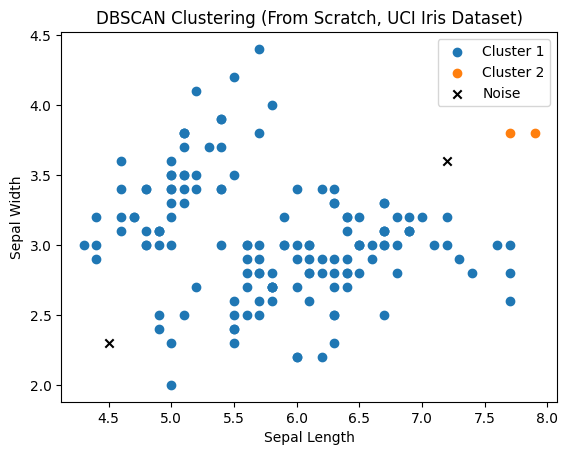

In [235]:
# Step 7: Visualisasi hasil clustering
def plot_dbscan(X, labels):
    unique_labels = set(labels)
    colors = plt.cm.get_cmap("tab10", len(unique_labels))

    for k in unique_labels:
        class_member_mask = (labels == k)
        xy = X[class_member_mask]
        if k == -1:
            plt.scatter(xy[:, 0], xy[:, 1], c='k', label='Noise', marker='x')
        else:
            plt.scatter(xy[:, 0], xy[:, 1], label=f'Cluster {k}', cmap=colors(k))

    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.legend()
    plt.title("DBSCAN Clustering (From Scratch, UCI Iris Dataset)")
    plt.show()

plot_dbscan(X, labels)

In [236]:
# Ambil label asli dari dataset iris
true_labels = iris.data.targets.values.flatten()

In [237]:
# Evaluasi: Adjusted Rand Index
ari = adjusted_rand_score(true_labels, labels)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")


Adjusted Rand Index (ARI): 0.0004


In [238]:
# Evaluasi: Silhouette Score (hanya jika jumlah cluster > 1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
if n_clusters > 1:
    sil_score = silhouette_score(X, labels)
    print(f"Silhouette Score: {sil_score:.4f}")
else:
    print("Silhouette Score tidak bisa dihitung (cluster terlalu sedikit).")

Silhouette Score: 0.2675
